#Self Organizing Map

##Install MiniSom Package

In [1]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=47edc312b257e78894af3c69a491f9912eeb19ccdd7d67e01433eb8c67bb8f18
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


### Importing the libraries


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [8]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


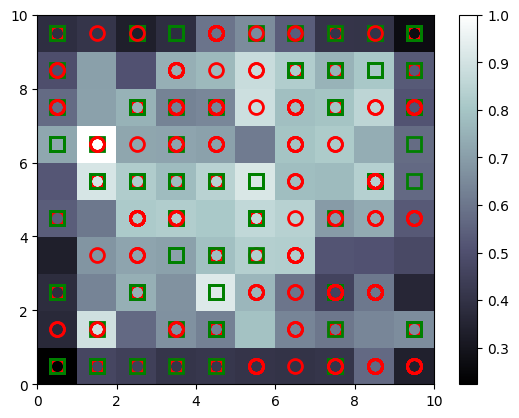

In [24]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, w[1] + 0.5, markers[Y[i]], markeredgecolor = colors[Y[i]], markerfacecolor = 'None', markersize = 10, markeredgewidth = 2)
show()

## Finding the frauds


In [35]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,6)], mappings[(1,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

[[1.5568162e+07 0.0000000e+00 1.9500000e+01 1.6500000e-01 2.0000000e+00
  1.1000000e+01 4.0000000e+00 4.0000000e-02 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.8000000e+02 1.0000000e+00]
 [1.5603565e+07 0.0000000e+00 2.2920000e+01 1.2500000e+00 2.0000000e+00
  1.1000000e+01 4.0000000e+00 2.5000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.2000000e+02 8.1000000e+02]
 [1.5645820e+07 0.0000000e+00 1.8080000e+01 3.7500000e-01 3.0000000e+00
  1.3000000e+01 1.0000000e+00 1.0000000e+01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 3.0000000e+02 1.0000000e+00]
 [1.5567919e+07 0.0000000e+00 2.3500000e+01 1.5000000e+00 2.0000000e+00
  9.0000000e+00 4.0000000e+00 8.7500000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.6000000e+02 1.0000000e+00]
 [1.5606554e+07 0.0000000e+00 3.2250000e+01 1.5000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 2.5000000e-01 0.0000000e+00 0.